In [1]:
from os.path import join

import sympy
from sympy import Symbol, sqrt, cos, pi, symbols
import numpy as np
import matplotlib.pylab as plt

import qnet
from qnet.algebra import *

import QDYN

from src.notebook_plots_v1 import plot_bs_decay, display_hamiltonian, display_eq, show_summary_dicke
from src.single_sided_network_v1 import network_slh
from src.dicke_half_model_v1 import write_dicke_half_model, err_dicke_half

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
qnet.init_printing()

$
\newcommand{ket}[1]{\vert #1 \rangle}
\newcommand{bra}[1]{\langle #1 \vert}
\newcommand{Op}[1]{\hat{#1}}
$

# Optimized Creation of Dicke State

## Can we create the Dicke states for 2 Nodes and T=1000 with density matrix OCT?

In [4]:
slh = network_slh(n_cavity=2, n_nodes=2, topology='driven_bs_fb')
write_dicke_half_model(
    slh, rf='./data/2nodes_T1000_rho', T=1000, theta=0,
    E0_cycles=2, mcwf=False, non_herm=False, lambda_a=1.0)

After 1000 iterations, and propagating resulting optimized pulse in Liouville space:

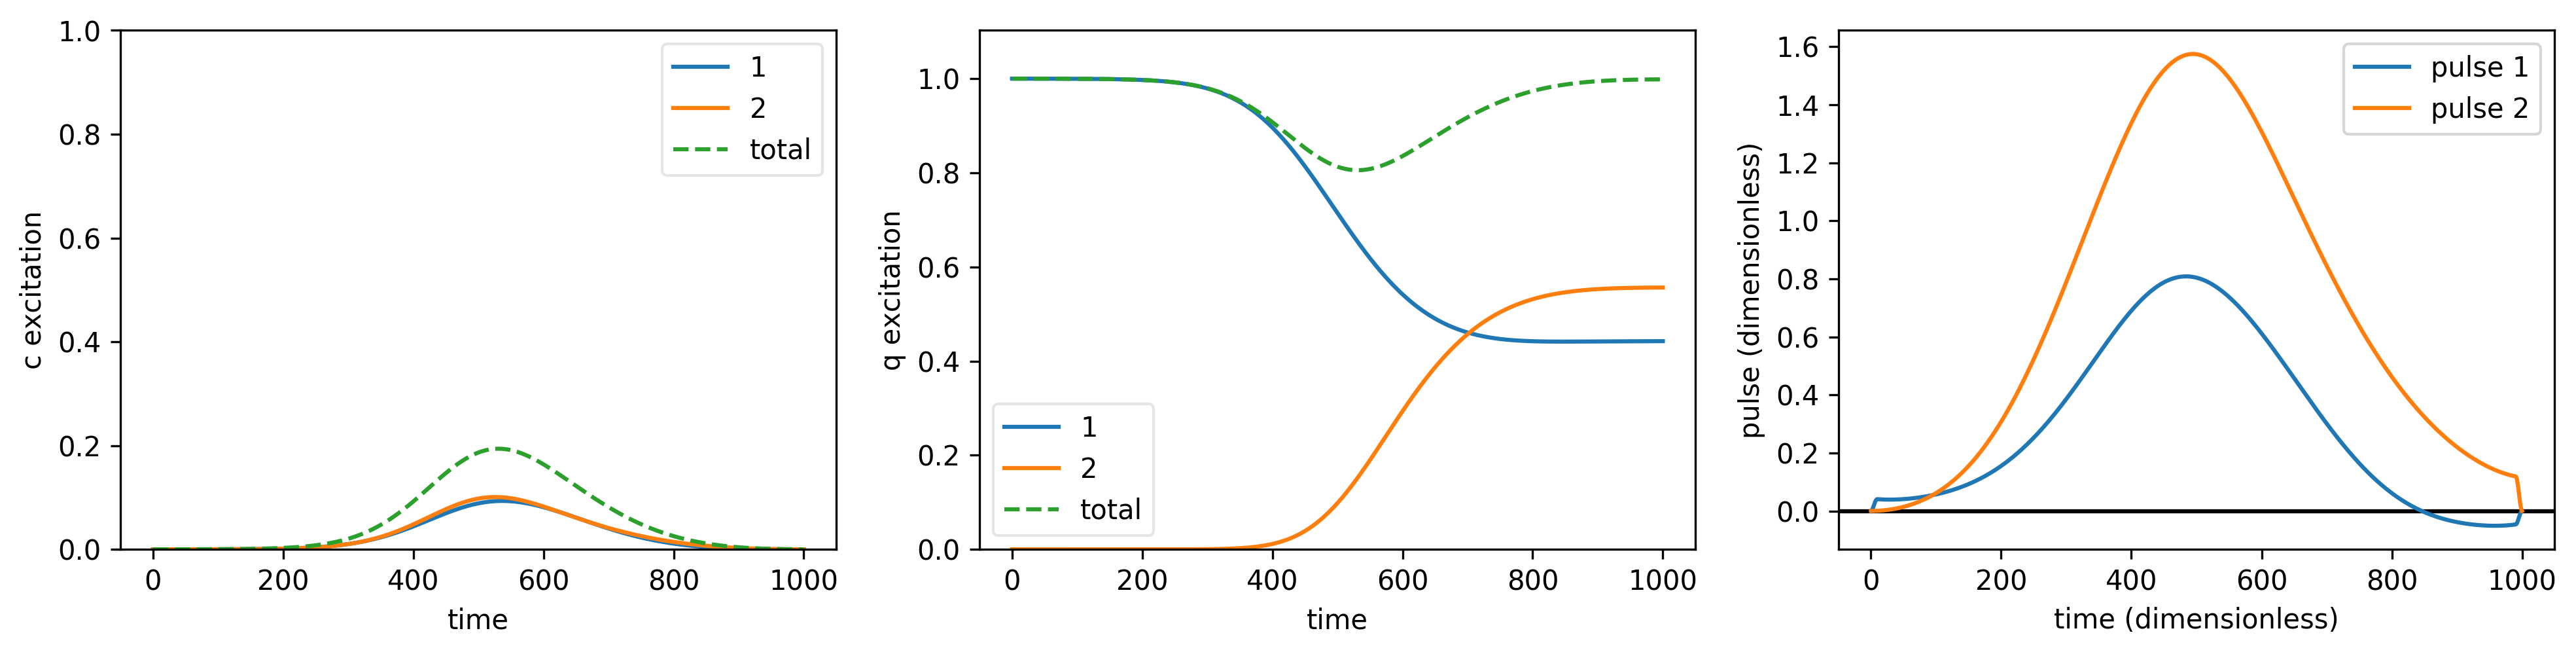

In [5]:
show_summary_dicke('./data/2nodes_T1000_rho/', dpi=300)

In [6]:
print("%.3e" % err_dicke_half('./data/2nodes_T1000_rho/', 'state_final.dat*', rho=True))

4.805e-03


## What is a good value for lambda_a?

In [7]:
slh = network_slh(n_cavity=2, n_nodes=2, topology='driven_bs_fb')

In [8]:
for i, lambda_a in enumerate([0.001, 0.01, 0.1]):
    rf = './data/2nodes_T1000_rho_lambda_a_%d' % (i+1)
    write_dicke_half_model(
        slh, rf=rf, T=1000, theta=0, J_T_conv=1e-2,
        E0_cycles=2, mcwf=False, non_herm=False, lambda_a=lambda_a)

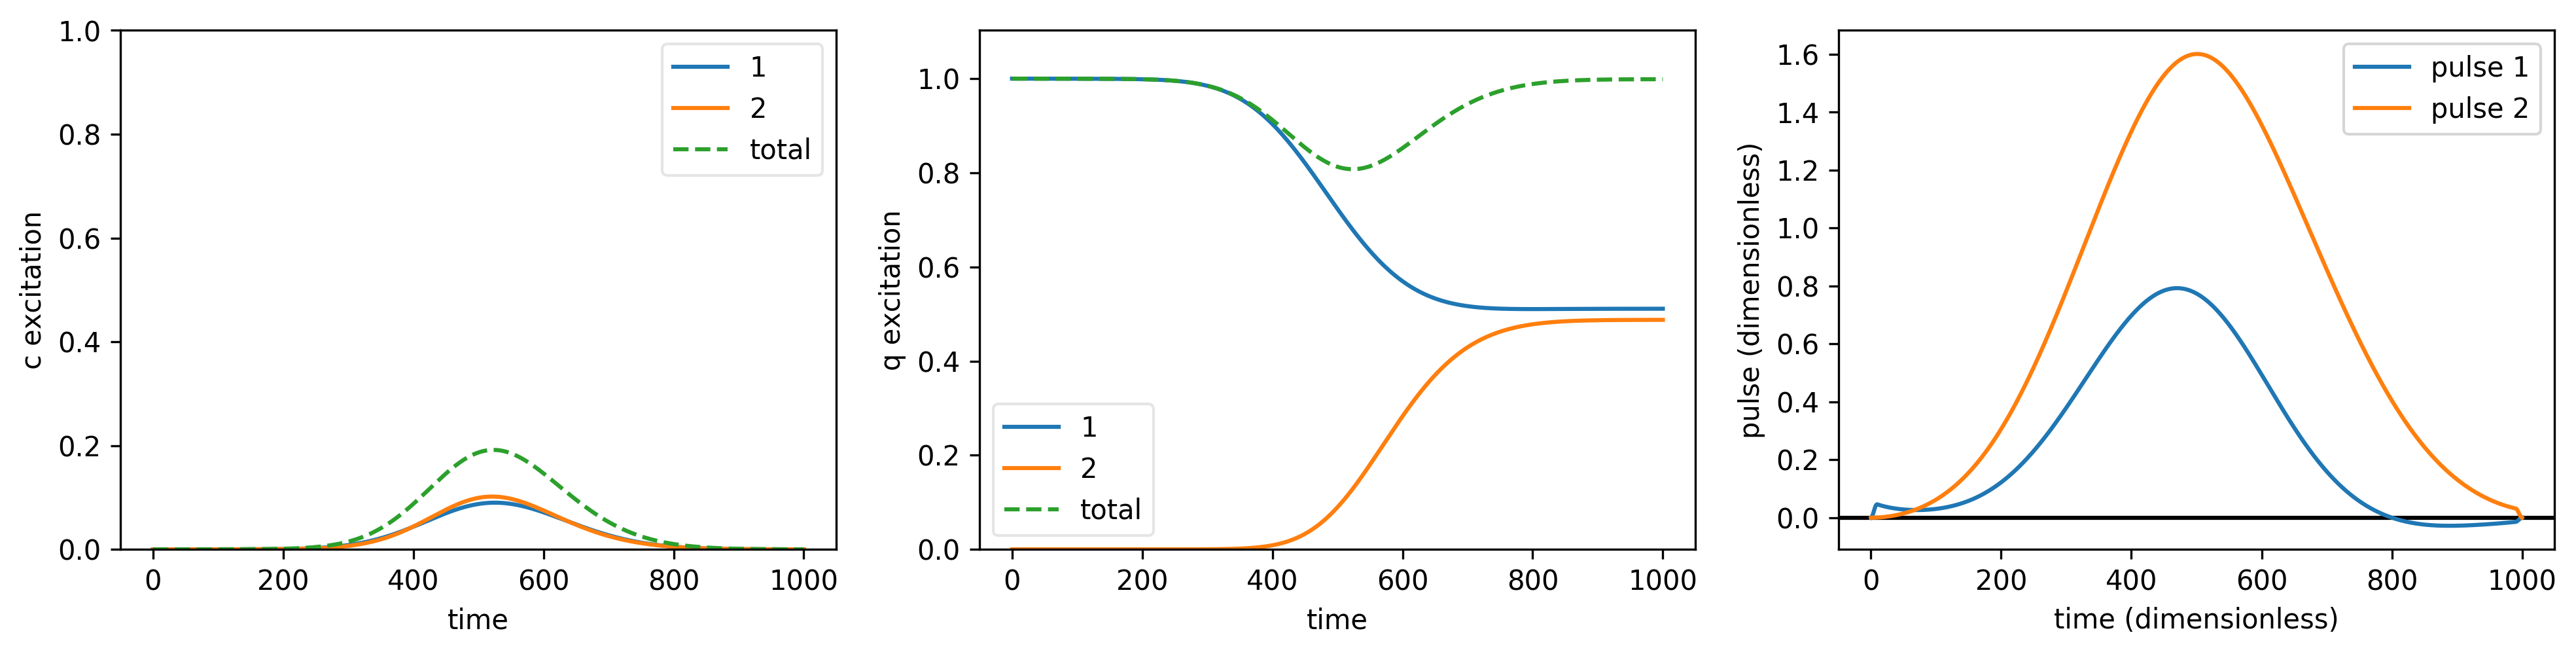

In [9]:
show_summary_dicke('./data/2nodes_T1000_rho_lambda_a_1/', dpi=300)

$\lambda_a = 0.001$ does it in a single iteration!

## What fidelities can we reach?

In [10]:
write_dicke_half_model(
    slh, rf='./data/2nodes_T1000_rho_low_error', T=1000, theta=0, J_T_conv=1e-10,
    E0_cycles=2, mcwf=False, non_herm=False, lambda_a=0.001)

convergence levels off very rapidly after first iteration, final error near `1e-6`

In [11]:
print("%.3e" % err_dicke_half('./data/2nodes_T1000_rho_low_error', 'state_final.dat*', rho=True))

1.813e-05


## What are good guess amplitudes?

In [12]:
for i, cycles in enumerate([0.1, 1, 2, 4, 10]):
    rf = './data/2nodes_T1000_rho_guess_cycle_%.1f' % cycles
    write_dicke_half_model(
        slh, rf=rf, T=1000, theta=0, J_T_conv=1e-2,
        E0_cycles=cycles, mcwf=False, non_herm=False, lambda_a=0.001)

After propagating the guess pulse

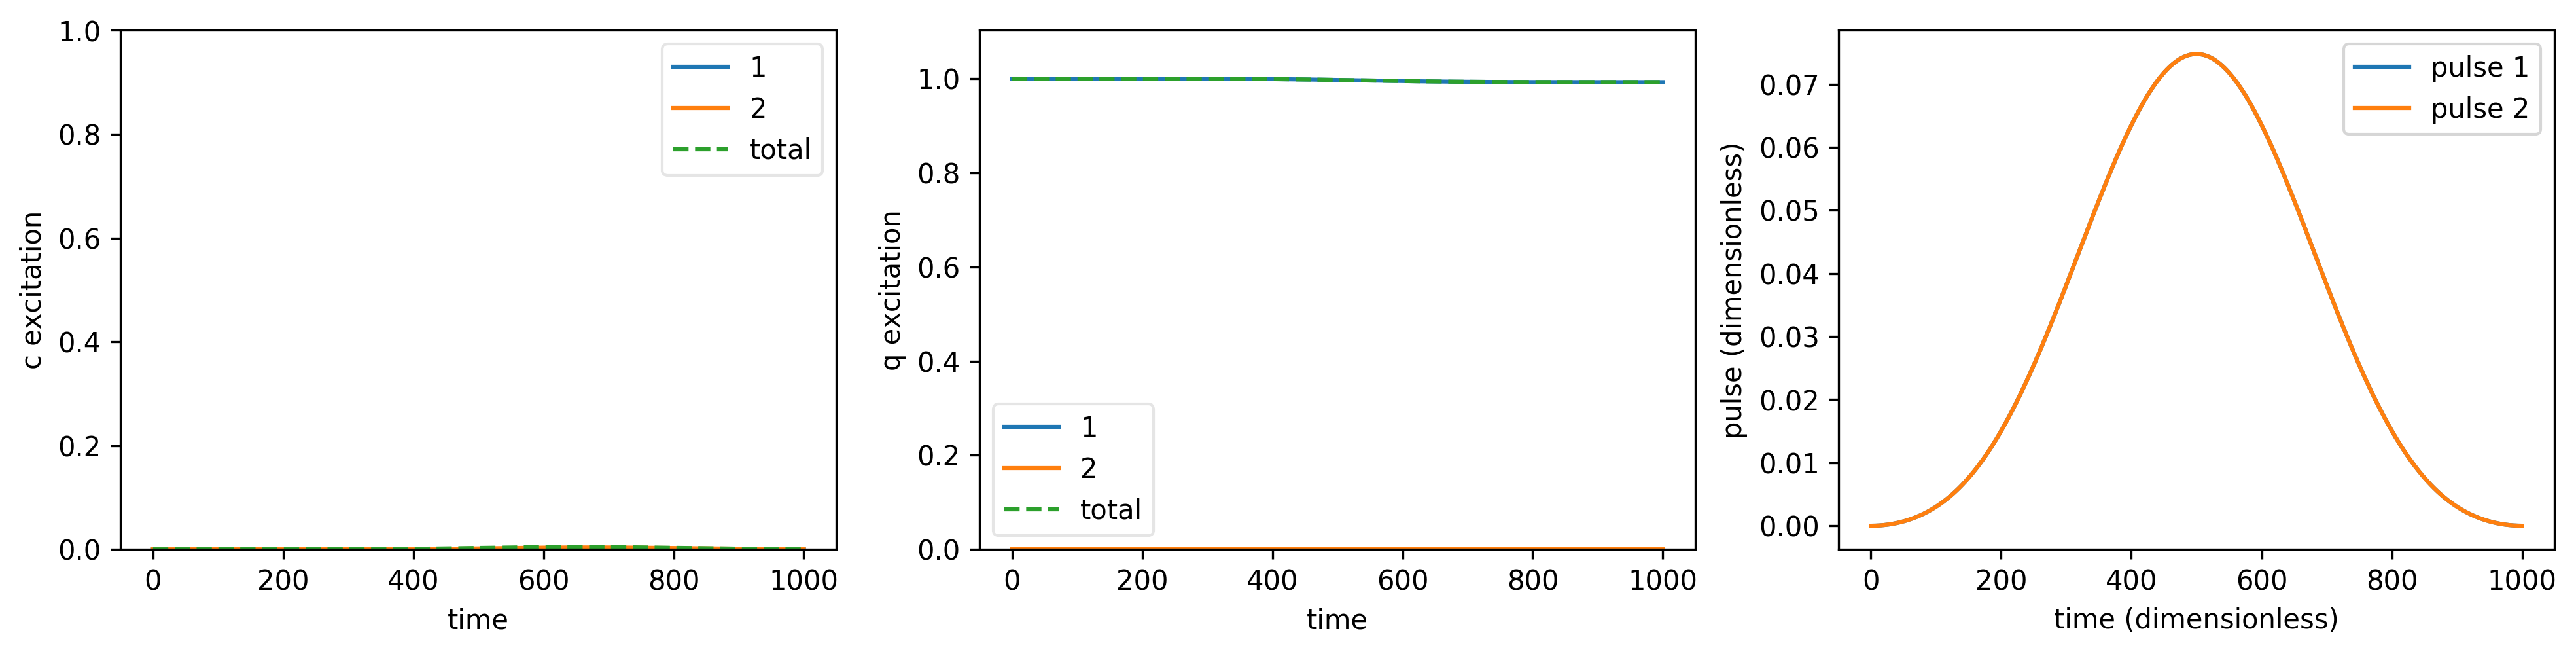

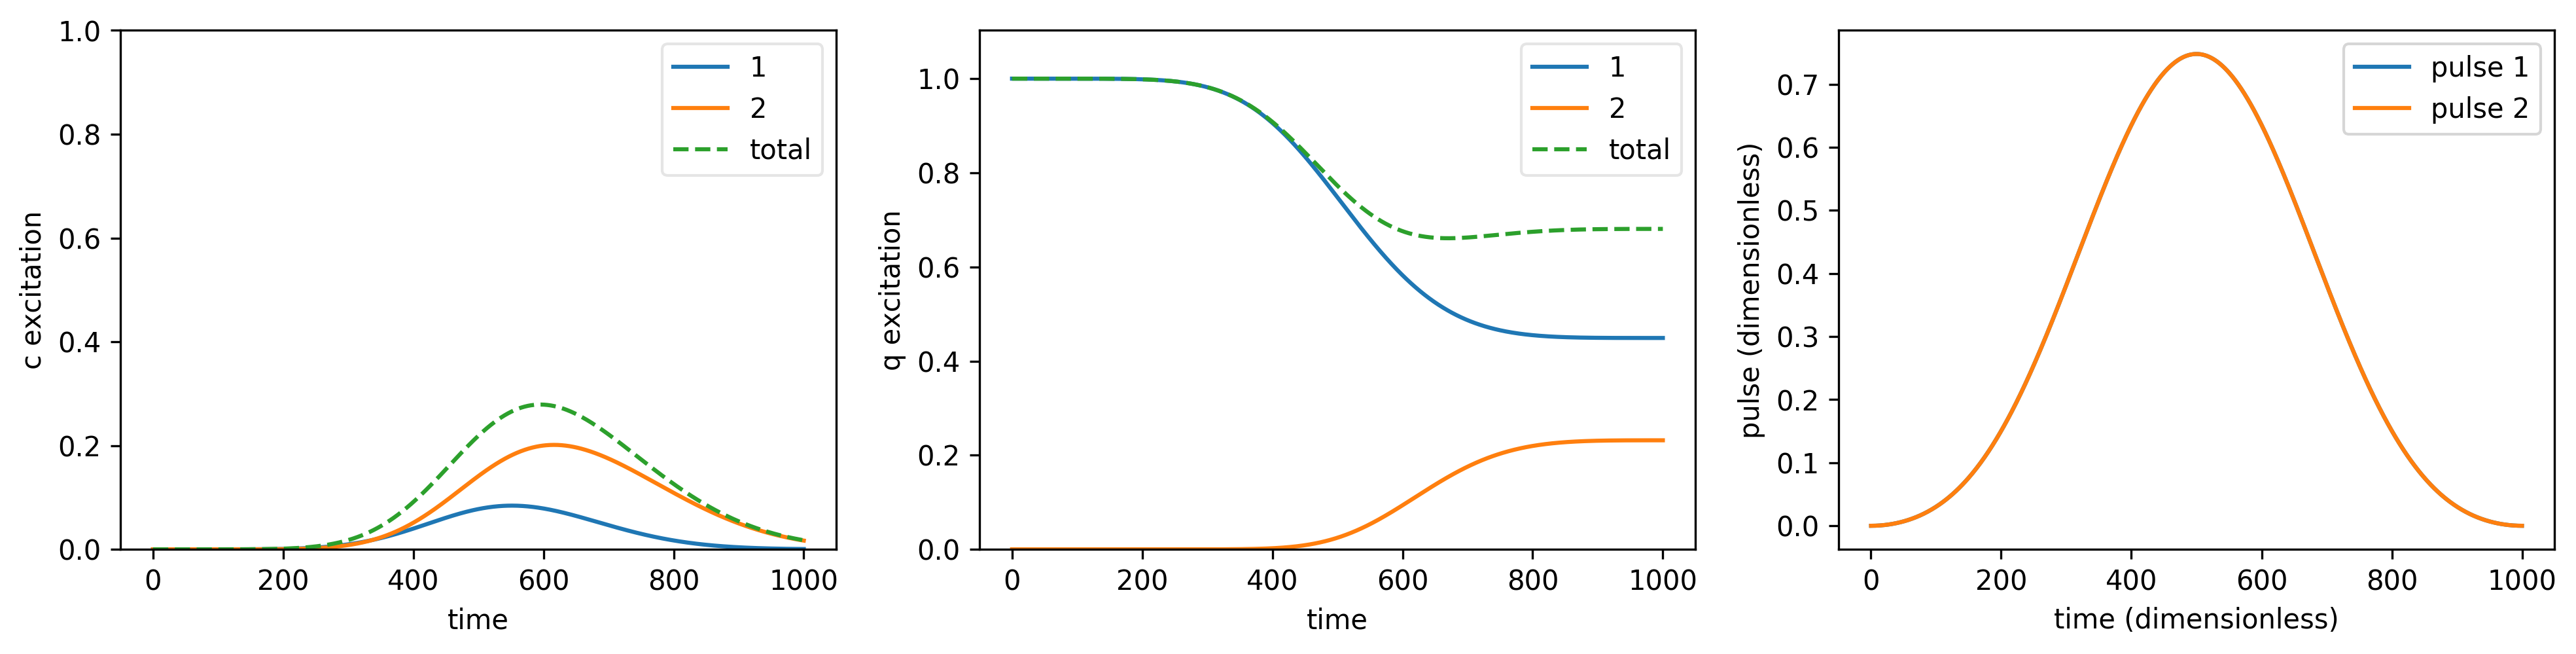

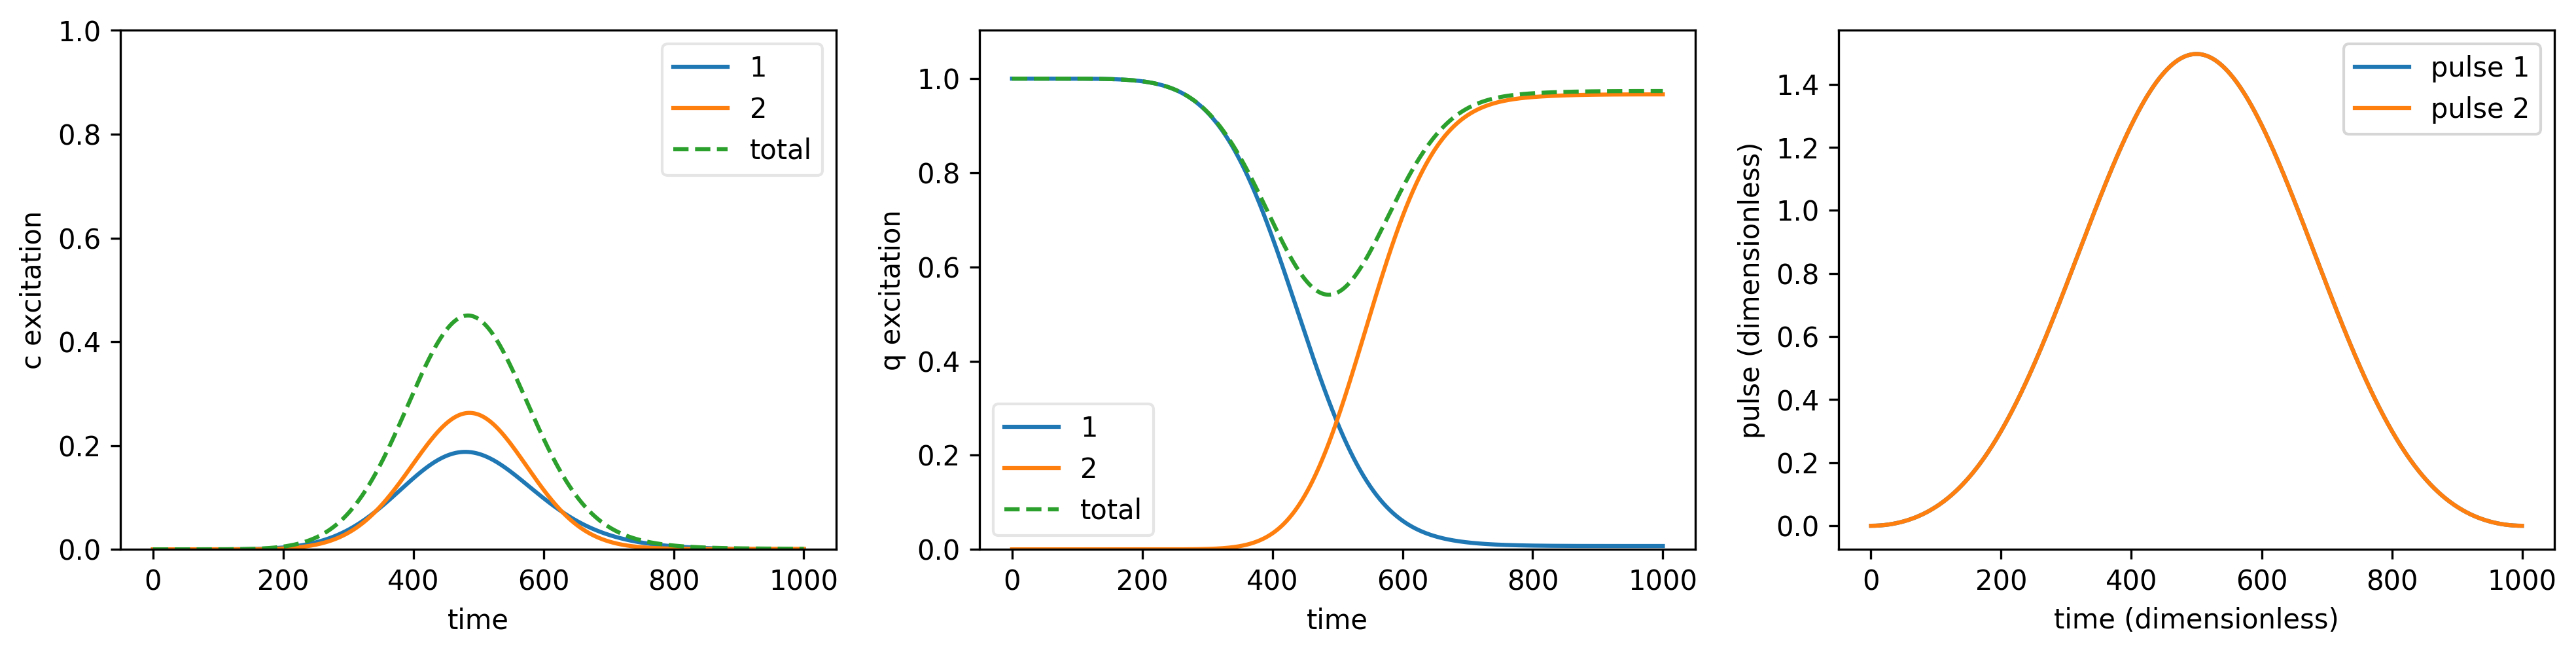

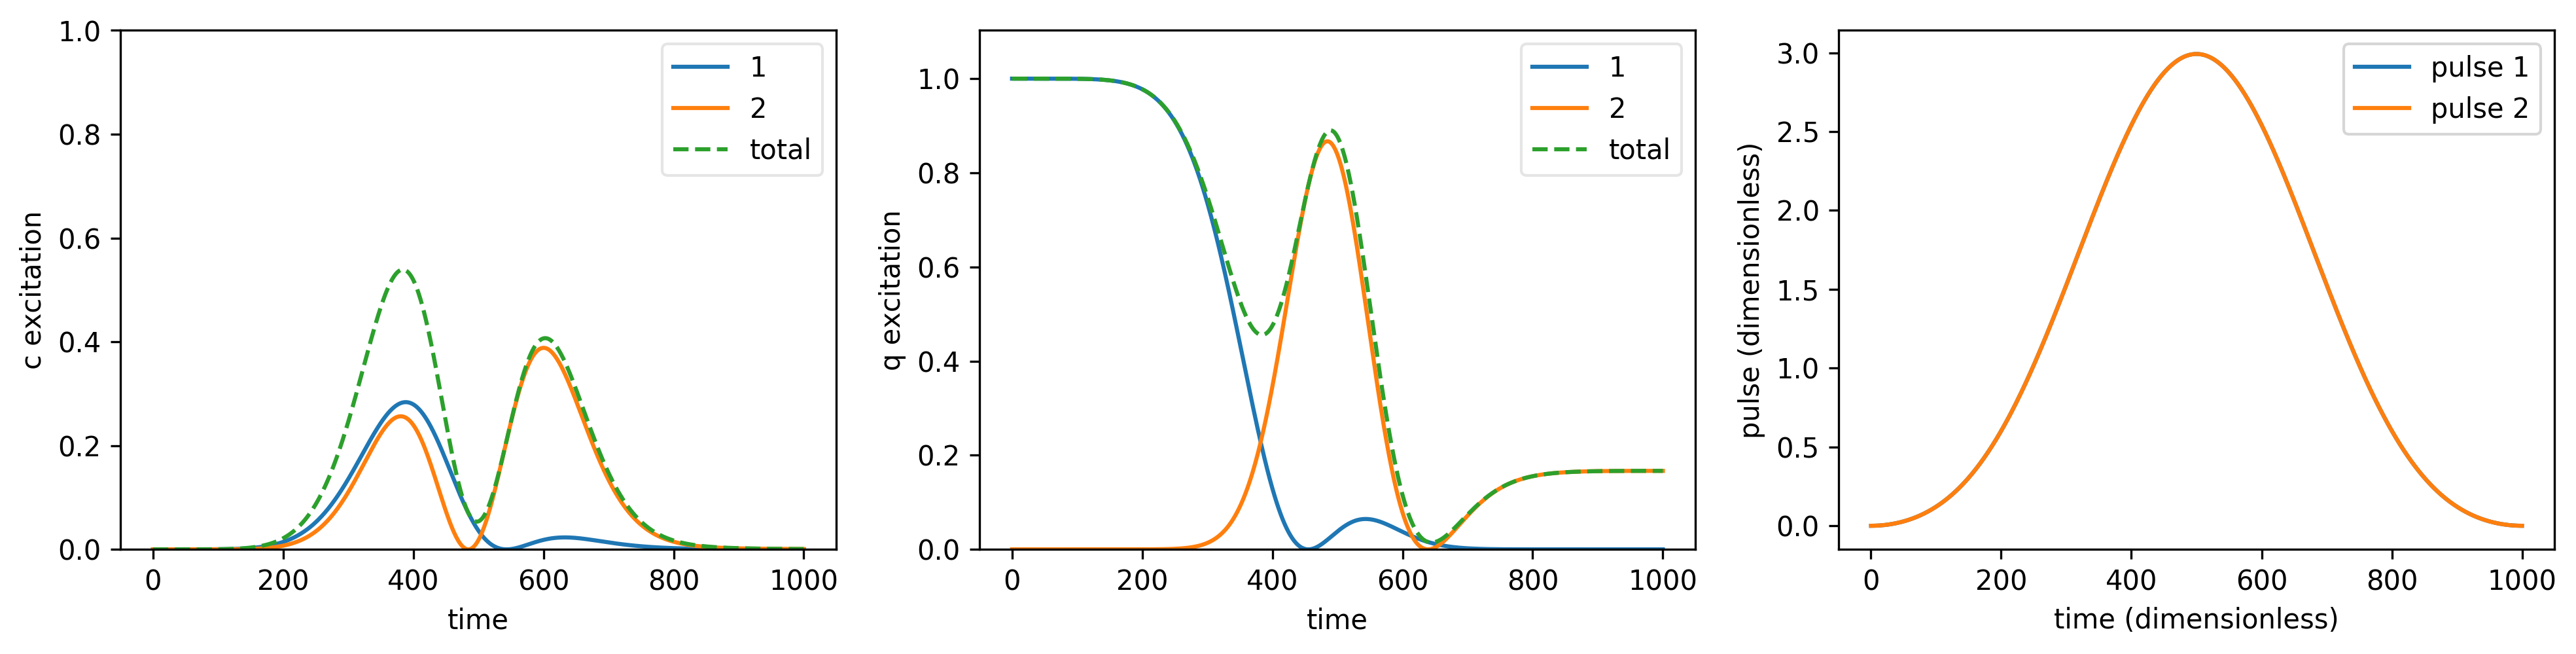

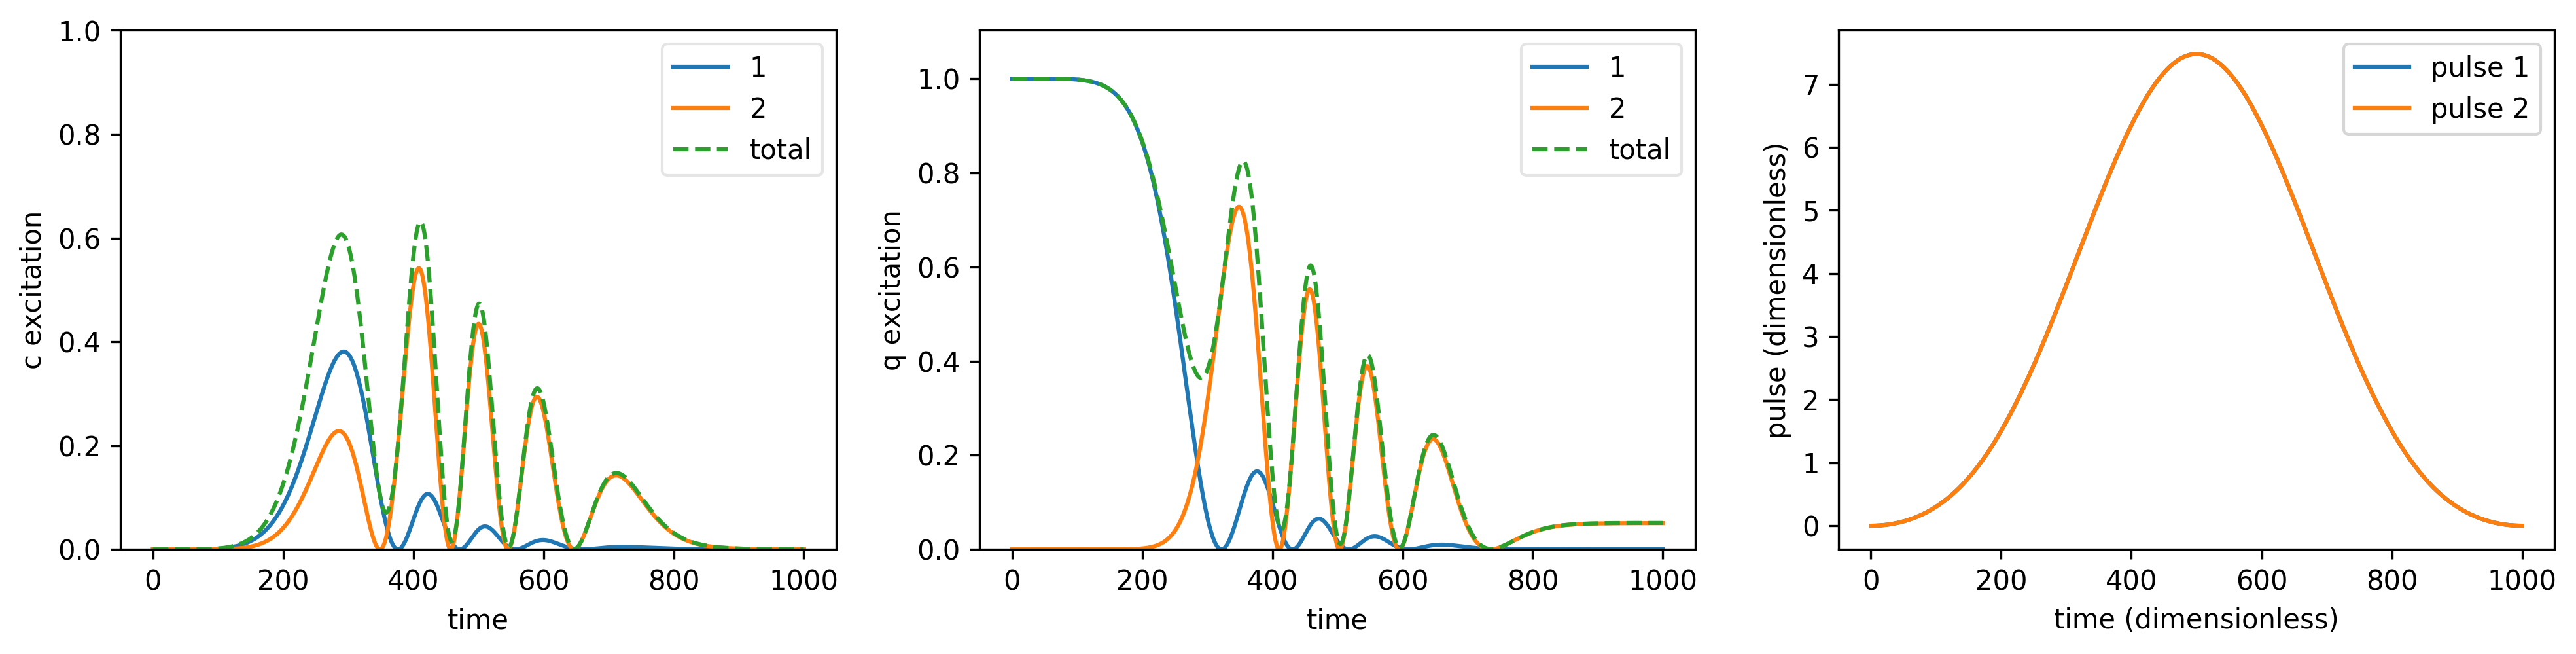

In [13]:
for i, cycles in enumerate([0.1, 1, 2, 4, 10]):
    rf = './data/2nodes_T1000_rho_guess_cycle_%.1f' % cycles
    show_summary_dicke(rf, dpi=300, pulses='pulse*.dat')

The $2 \pi$ pulse was a particularly good choice: It fulfills the dark state condition, and does population inversion!

Can we still optimize from a less optimal starting point?

In [14]:
write_dicke_half_model(
    slh, rf='./data/2nodes_T1000_rho_cycle_4.0', T=1000, theta=0, J_T_conv=1e-2,
    E0_cycles=4, mcwf=False, non_herm=False, lambda_a=0.001)

Works fine!

In [15]:
write_dicke_half_model(
    slh, rf='./data/2nodes_T1000_rho_cycle_4.0_2', T=1000, theta=0, J_T_conv=1e-2,
    E0_cycles=4, mcwf=False, non_herm=False, lambda_a=0.0001)

We can even go to lower $\lambda_a$ for faster convergence! -- Only initially, though, OCT gets a little stuck

In [16]:
write_dicke_half_model(
    slh, rf='./data/2nodes_T1000_rho_cycle_4.0_3', T=1000, theta=0, J_T_conv=1e-2,
    E0_cycles=4, mcwf=False, non_herm=False, lambda_a=0.01)

Larger $\lambda_a$ are slower overall

## Can we cut the time in half?

Does the $2 \pi$ guess pulse still work well for shorter durations?

In [17]:
write_dicke_half_model(
    slh, rf='./data/2nodes_T500_rho_guess', T=500, theta=0,
    E0_cycles=2, mcwf=False, non_herm=False, lambda_a=0.001)

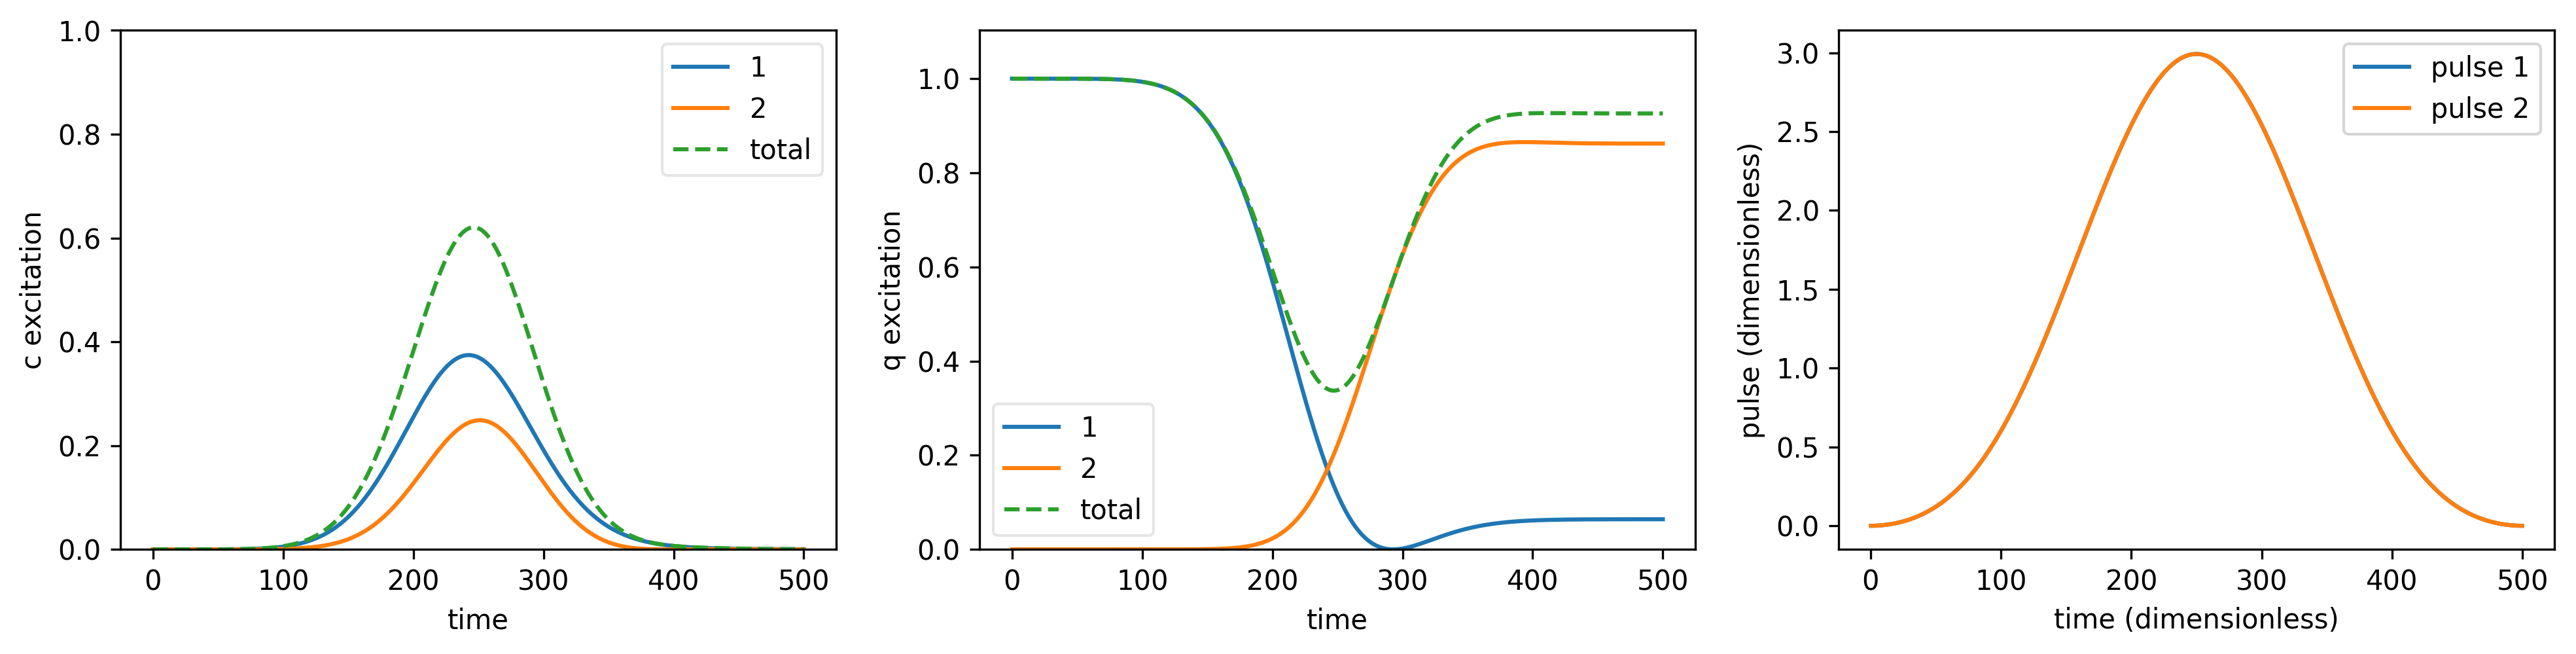

In [18]:
show_summary_dicke('./data/2nodes_T500_rho_guess', dpi=300, pulses='pulse*.dat')

similar, but breakdown starting

In [19]:
write_dicke_half_model(
    slh, rf='./data/2nodes_T500_rho', T=500, theta=0,
    E0_cycles=2, mcwf=False, non_herm=False, lambda_a=0.001)

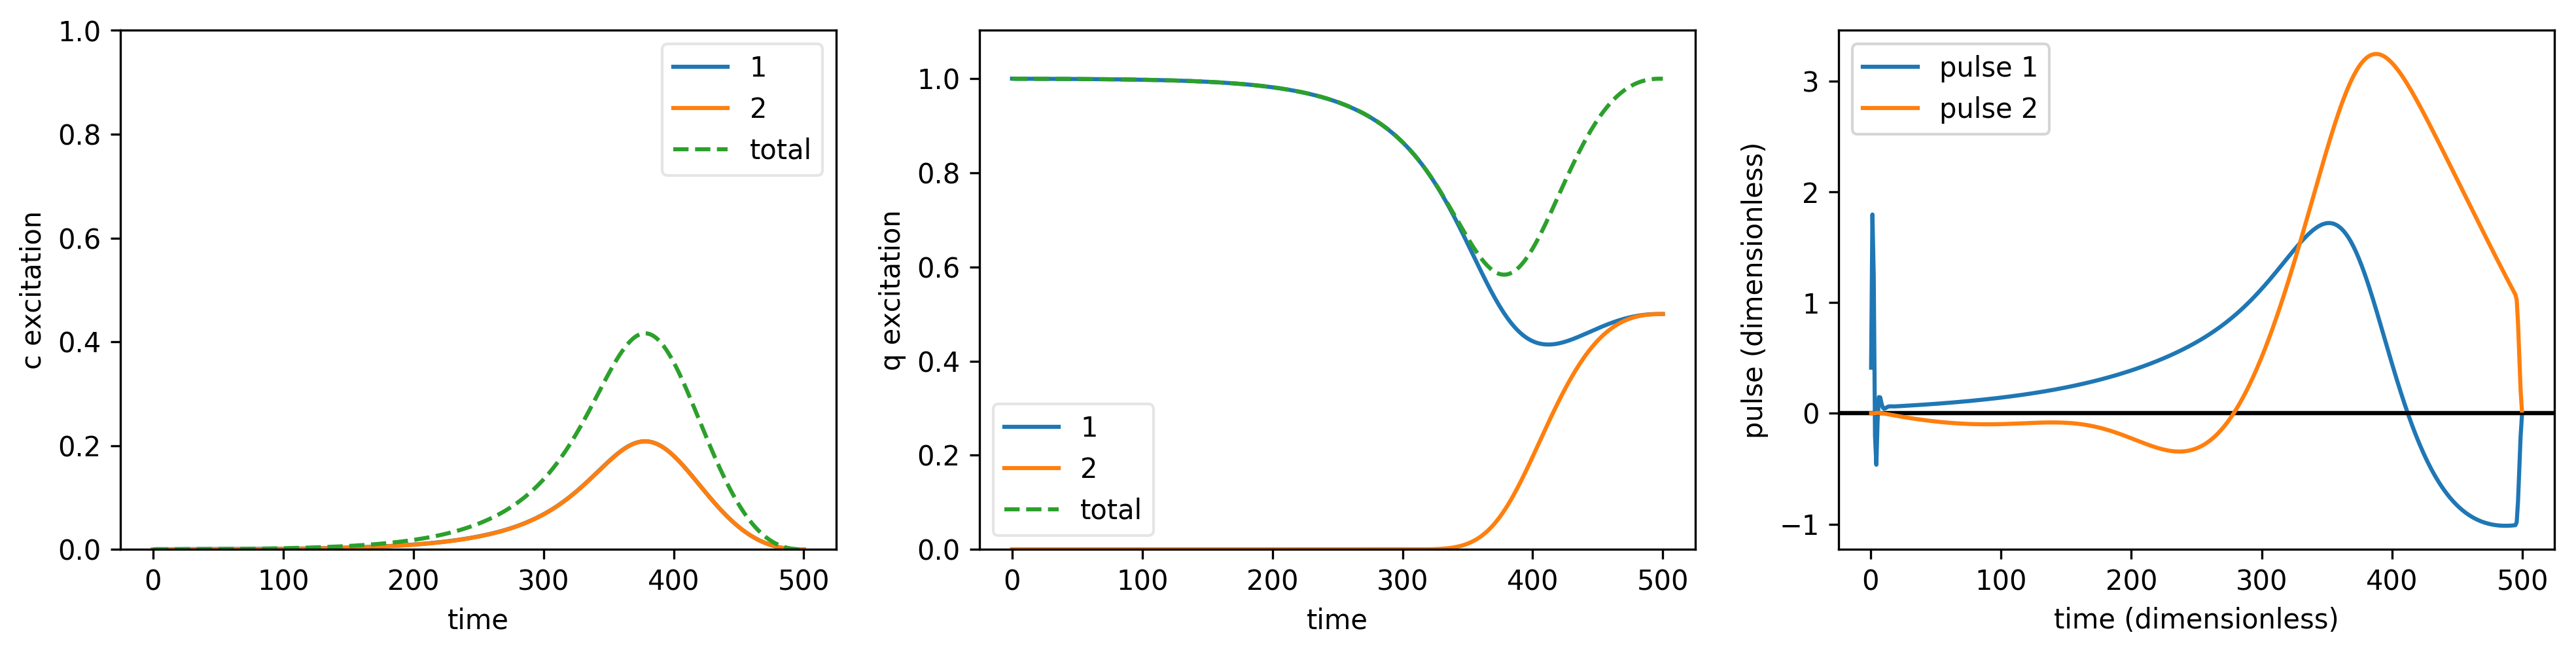

In [20]:
show_summary_dicke('./data/2nodes_T500_rho', dpi=300)

$\lambda_a$ is too small in this case! That peak in the beginning isn't very desirable

In [21]:
write_dicke_half_model(
    slh, rf='./data/2nodes_T500_rho_2', T=500, theta=0,
    E0_cycles=2, mcwf=False, non_herm=False, lambda_a=0.01)

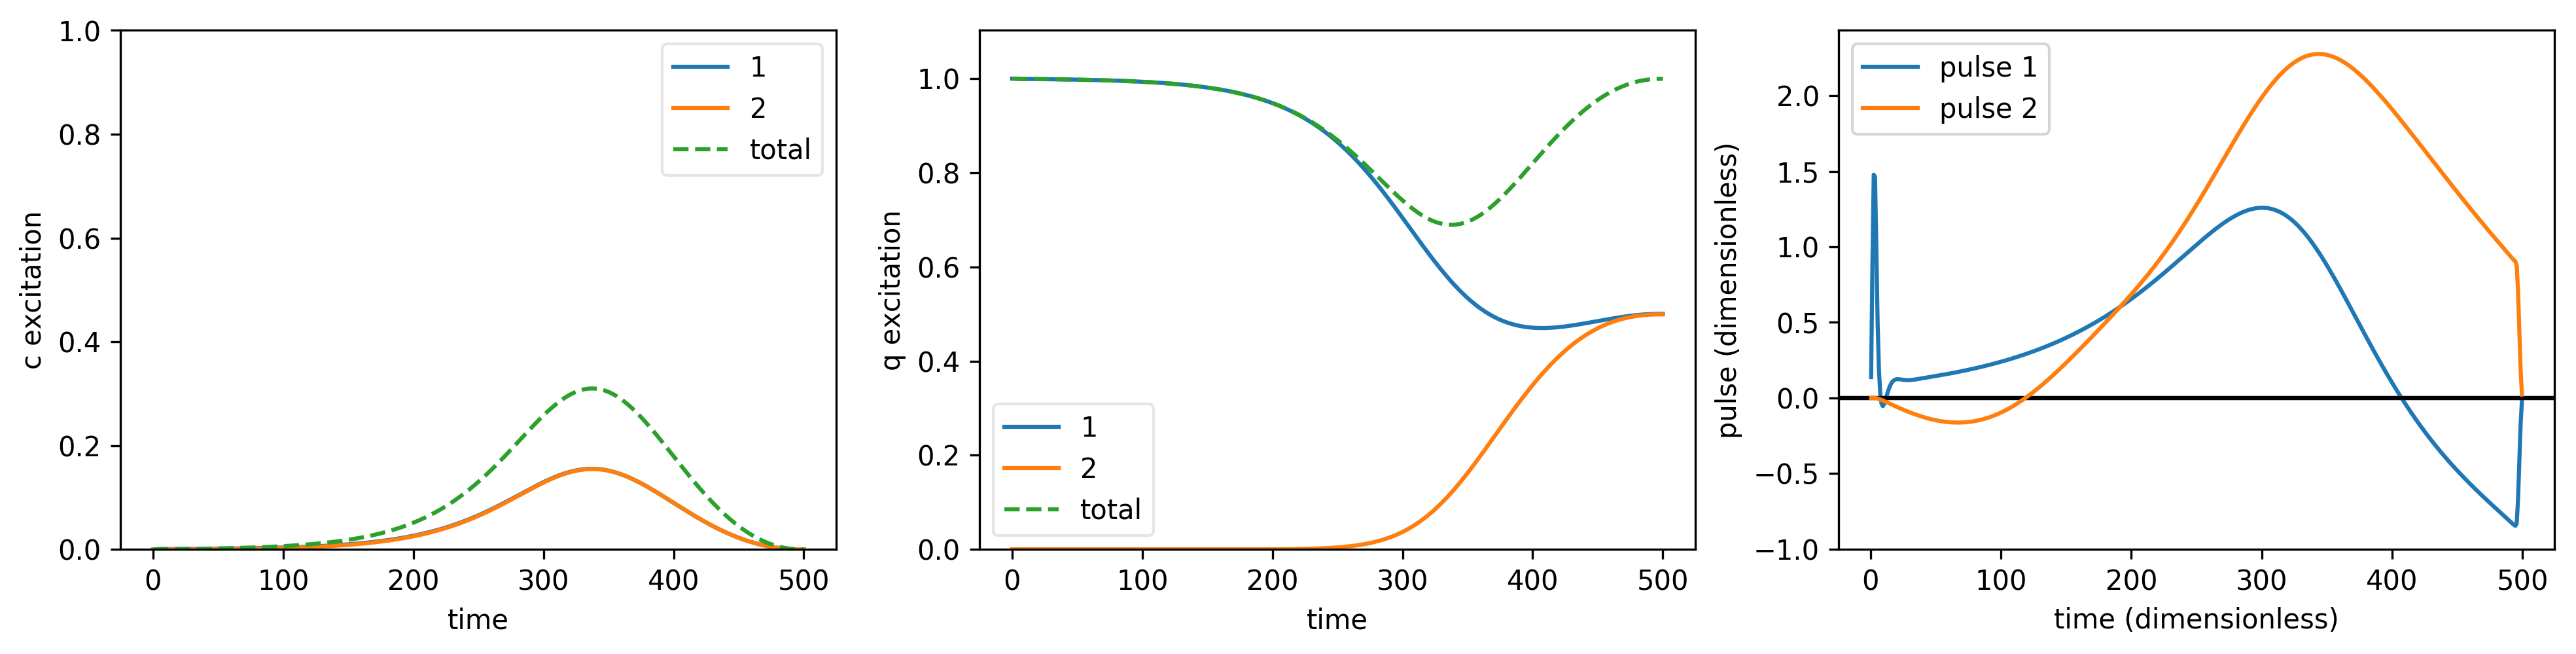

In [22]:
show_summary_dicke('./data/2nodes_T500_rho_2', dpi=300)

## What is the QSL for two nodes?

In [23]:
Ts = [10, 50, 100, 200, 250, 300, 350, 400, 600, 800, 900]

In [24]:
for T in Ts:
    write_dicke_half_model(
        slh, rf='./data/2nodes_T%d_rho' % T, T=T, theta=0,
        E0_cycles=2, mcwf=False, non_herm=False, lambda_a=0.01, iter_stop=20000)

In [25]:
Ts2 = sorted(Ts + [500, 1000])

In [26]:
Ts2

In [27]:
def get_errors(Ts):
    convergences = {}
    for T in Ts:
        fn = './data/2nodes_T%d_rho/oct_iters.dat' % T
        if T == 1000:
            fn = './data/2nodes_T1000_rho_low_error/oct_iters.dat'
        convergences[T] = np.genfromtxt(fn, usecols=(1,), unpack=True)
    return convergences

In [28]:
errors = get_errors(Ts2)

In [29]:
def plot_errors():
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111)
    ax.plot(Ts2, [errors[T][-1] for T in Ts2], 'o-')
    ax.set_yscale('log')
    ax.set_xlabel(r'time ($\hbar/g$)')
    ax.set_ylabel(r'optimization error')
    plt.show(fig)

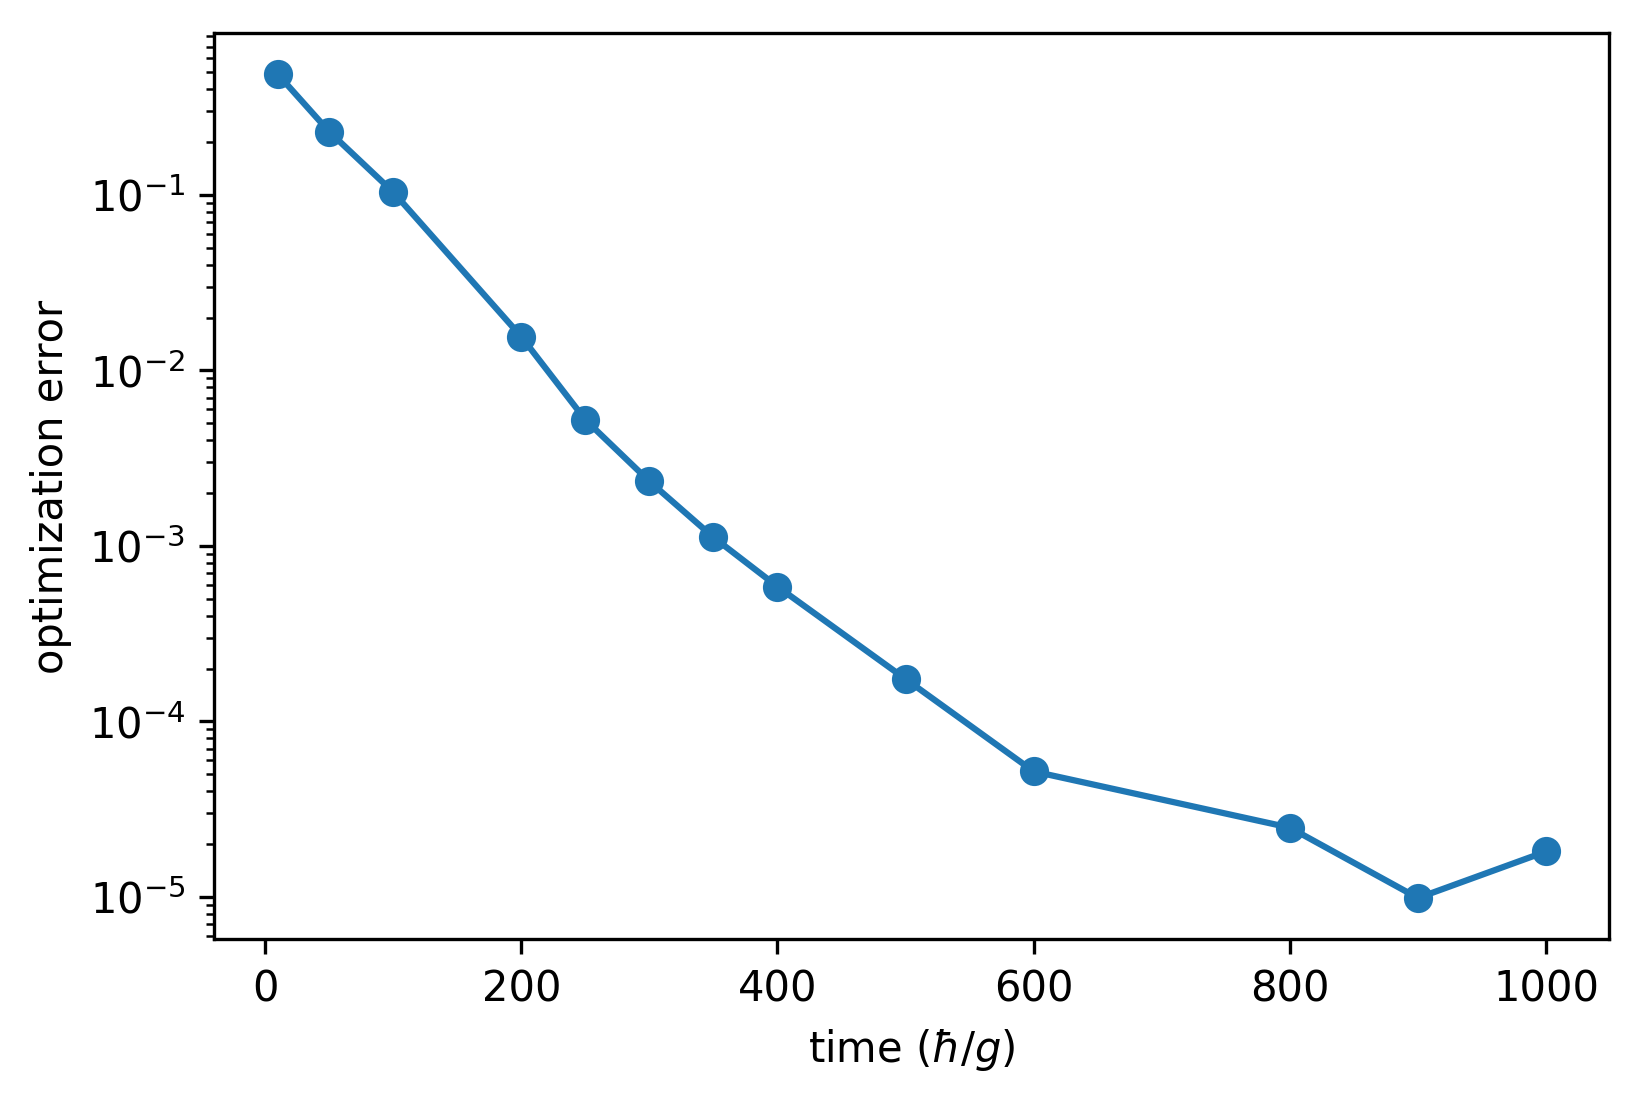

In [30]:
plot_errors()

Are there any problems with time discretization?

In [31]:
write_dicke_half_model(
    slh, rf='./data/2nodes_T100_rho_nt', T=100, theta=0,
    E0_cycles=2, mcwf=False, non_herm=False, lambda_a=0.01, iter_stop=20000, nt=500)

no significant change in gate errors with higher time resolution

# Example optimization commands

*   density matrix optimization

    ```OMP_NUM_THREADS=1 qdyn_optimize --J_T=J_T_re .```

*   trajectory optimization

    ```OMP_NUM_THREADS=1 qdyn_optimize --n-trajs=20 --J_T=J_T_sm .```
   
*   density matrix propagation

    ```OMP_NUM_THREADS=1 qdyn_prop_traj --use-oct-pulses --write-final-state=state_final.dat .```